# Cleaning and Exploring the Bankruptcy dataset for Polish Companies

In [2]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import json
from ucimlrepo import fetch_ucirepo 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 
  
# data (as pandas dataframes) 
# X = polish_companies_bankruptcy.data.features 
# y = polish_companies_bankruptcy.data.targets 
  

In [5]:
polish_companies_bankruptcy.keys()

dict_keys(['data', 'metadata', 'variables'])

In [6]:
# Number of companies
print('The total number of companies in this dataset is:', len(polish_companies_bankruptcy['data']['features']))

The total number of companies in this dataset is: 43405


In [7]:
# Number of features available
print('The total number of feautures in this dataset is:', len(polish_companies_bankruptcy['data']['headers']))

The total number of feautures in this dataset is: 66


In [8]:
polish_companies_bankruptcy['data']['headers']

Index(['year', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40',
       'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50',
       'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60',
       'A61', 'A62', 'A63', 'A64', 'class'],
      dtype='object')

In [30]:
# Saving the features and target 
X = polish_companies_bankruptcy['data']['features']
y = polish_companies_bankruptcy['data']['targets']



# Join the features and target together
df = X.join(y)
df.head()
df.isnull().sum().sort_values(ascending=False)

A37      18984
A21       5854
A27       2764
A60       2152
A45       2147
         ...  
A57          7
A59          7
A55          1
year         0
class        0
Length: 66, dtype: int64

In [31]:
# Rename the 'class' column to 'Bankrupt'
df.rename(columns={'class': 'bankrupt'}, inplace=True)
df['bankrupt'].replace({0:False, 1:True}, inplace=True)
df.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,False
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,False
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,False
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,False
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,False


In [32]:
df.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,False
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,False
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,False
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,False
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,False


### Exploratory Data Analysis

In [33]:
df.shape

(43405, 66)

In [34]:
df.year.value_counts()

year
3    10503
2    10173
4     9792
1     7027
5     5910
Name: count, dtype: int64

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,43405.0,2.939753,1.283975,1.000000e+00,2.000000,3.00000,4.00000,5.000000e+00
A1,43397.0,0.035160,2.994109,-4.638900e+02,0.003429,0.04966,0.12958,9.428000e+01
A2,43397.0,0.590212,5.842748,-4.308700e+02,0.268980,0.47190,0.68832,4.809600e+02
A3,43397.0,0.114431,5.439429,-4.799600e+02,0.021521,0.19661,0.40339,2.833600e+01
A4,43271.0,6.314702,295.434425,-4.031100e-01,1.049500,1.56980,2.78745,5.343300e+04
...,...,...,...,...,...,...,...,...
A60,41253.0,448.106669,32345.181862,-1.244000e+01,5.545500,9.79170,20.18100,4.818700e+06
A61,43303.0,17.033202,553.049406,-1.265600e+01,4.510150,6.63630,10.39450,1.080000e+05
A62,43278.0,1502.521234,139302.334863,-2.340000e+06,42.144000,71.32600,117.22000,2.501600e+07
A63,43271.0,9.343074,124.177354,-1.543200e+00,3.097650,5.08760,8.59885,2.345400e+04


In [13]:
df.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


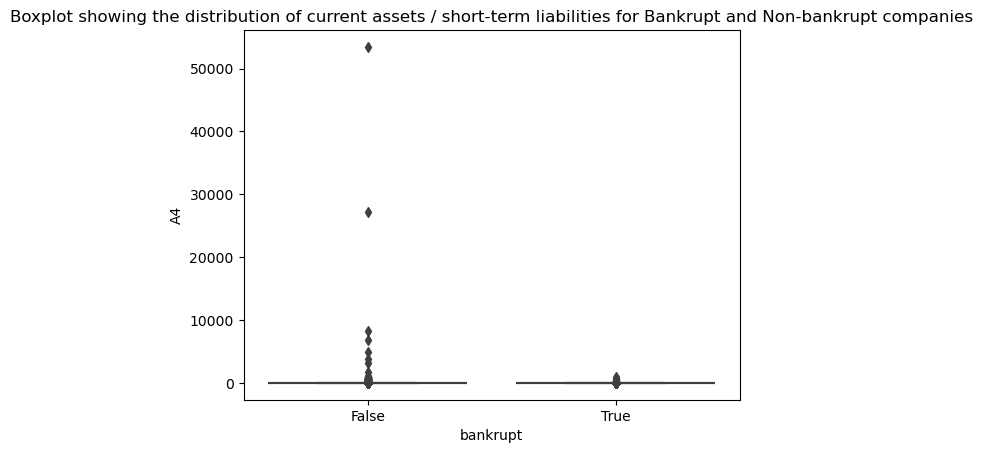

In [36]:
sns.boxplot(df, y='A4', x='bankrupt')
plt.title('Boxplot showing the distribution of current assets / short-term liabilities for Bankrupt and Non-bankrupt companies');

The Box and Whisker plot above shows the presence of Outliers in the dataset. This means that the strategy for imputing null values should be 'median' as these outliers will affect the mean of the dataset. The median is not affected by the presence of these outliers which in turn cause skewness.

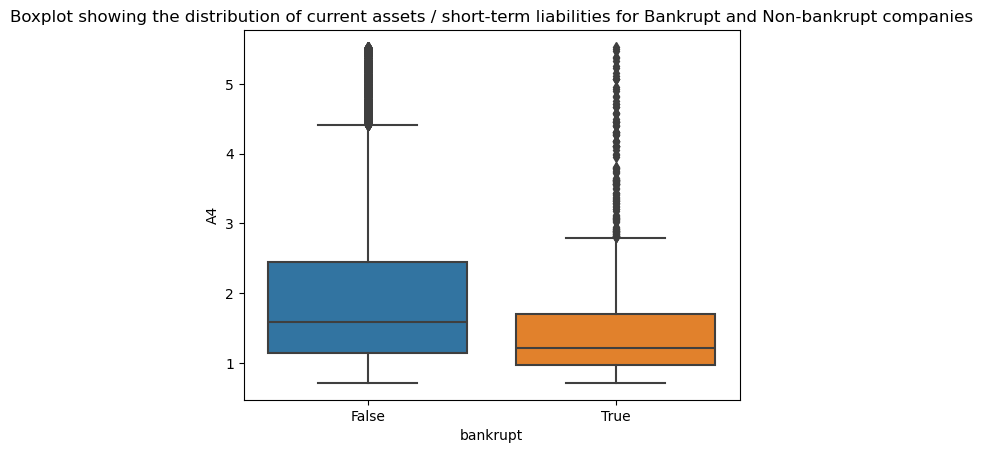

In [37]:
# Plotting the Box and Whisker plot for datapoints between the 10th and 90th percentile
q1, q3 = df['A4'].quantile([0.1, 0.9])
masked_df = df['A4'].between(q1, q3)
sns.boxplot(df[masked_df], y='A4', x='bankrupt')
plt.title('Boxplot showing the distribution of current assets / short-term liabilities for Bankrupt and Non-bankrupt companies');

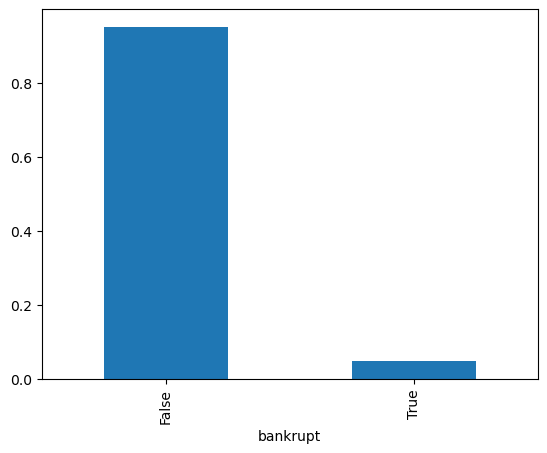

In [38]:
df['bankrupt'].value_counts(normalize=True).plot(kind='bar');

The above chart shows that there is class imbalance. In the bid to find out which resampling technique will work the most, I will create model instances for both oversampled and undersampled datasets and find out the better performing models.

### Feature Engineering and Selection

In [39]:
# Split into features and target
target = 'bankrupt'
X = df.drop(target, axis=1)
y = df[target]


In [40]:
# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (34724, 65)
Shape of y_train: (34724,)
Shape of X_test: (8681, 65)
Shape of y_test: (8681,)


In [41]:
# The value distribution
y_train.value_counts()

bankrupt
False    33074
True      1650
Name: count, dtype: int64

##### Baseline accuracy score

In [42]:
# Set a baseline accuracy score
bl_score = y_train.value_counts(normalize=True)[0]
bl_score

C:\Users\ADMIN PC\AppData\Local\Temp\ipykernel_21376\2307984772.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bl_score = y_train.value_counts(normalize=True)[0]


0.9524824328994356

In [43]:
# Fit the training set into an oversampler
over_sampler = RandomOverSampler(random_state=42)

X_over_sampled, y_over_sampled = over_sampler.fit_resample(X_train, y_train)
print('Shape of over sampled X_train:', X_over_sampled.shape)
print('Shape of over sampled y_train:', y_over_sampled.shape)

Shape of over sampled X_train: (66148, 65)
Shape of over sampled y_train: (66148,)


Over sampling simply means, increasing the data points of the minority class to have the same number of datapoints as the majority class

In [44]:
# Fit the training set to an undersampler
under_sampler = RandomUnderSampler(random_state=42)

X_under_sampled, y_under_sampled = under_sampler.fit_resample(X_train, y_train)
print('Shape of under sampled X_train:', X_under_sampled.shape)
print('Shape of under sampled y_train:', y_under_sampled.shape)

Shape of under sampled X_train: (3300, 65)
Shape of under sampled y_train: (3300,)


In [45]:
# Creating instances of a DecisionTreeClassifier model and fitting each of the over sampled, under sampled and original dataset.

model_norm = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('decisiontree', DecisionTreeClassifier(random_state=42))])
model_norm.fit(X_train, y_train)

model_os = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('decisiontree', DecisionTreeClassifier(random_state=42))])
model_os.fit(X_over_sampled, y_over_sampled)

model_us = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('decisiontree', DecisionTreeClassifier(random_state=42))])
model_us.fit(X_under_sampled, y_under_sampled)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('decisiontree', DecisionTreeClassifier(random_state=42))])

In [46]:
models = [model_norm, model_os, model_us]

for model in models:
    acc_train = model.score(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f'Accuracy score on training set: {acc_train},  testing set: {acc}')

Accuracy score on training set: 1.0,  testing set: 0.9505817302154129
Accuracy score on training set: 1.0,  testing set: 0.9523096417463426
Accuracy score on training set: 0.8074242598778942,  testing set: 0.7842414468379219


**From the accuracy scores shown above, I'll continue using the Over_sampled dataset in building an Emsemble Classification model** 

In [47]:
# Save the dataframe to csv
df.to_csv('../data/cleaned_dataframe.csv')